<a href="https://colab.research.google.com/github/Rushikesh-Chavan-777/DeepLearning-Projects/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# importing the Kaggle API client
import os
from zipfile import ZipFile

# Downloading dataset from kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d omkargurav/face-mask-dataset


# extracting the compessed Dataset
dataset = '/content/face-mask-dataset.zip' # Path to the downloaded zip file

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
The dataset is extracted


In [10]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_318.jpg', 'with_mask_1261.jpg', 'with_mask_1279.jpg', 'with_mask_2010.jpg', 'with_mask_2866.jpg']
['with_mask_2730.jpg', 'with_mask_1234.jpg', 'with_mask_2153.jpg', 'with_mask_3415.jpg', 'with_mask_1811.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2036.jpg', 'without_mask_1800.jpg', 'without_mask_3477.jpg', 'without_mask_3367.jpg', 'without_mask_174.jpg']
['without_mask_2361.jpg', 'without_mask_1572.jpg', 'without_mask_2373.jpg', 'without_mask_1114.jpg', 'without_mask_31.jpg']


In [14]:
##creating the labels
len(with_mask_files)

3725

In [15]:
len(without_mask_files)

3828

In [16]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [17]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


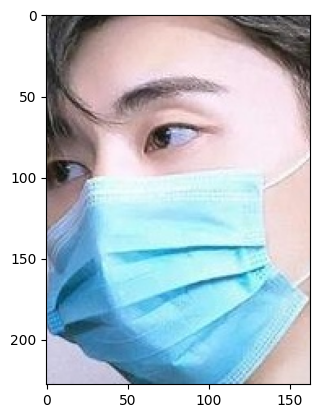

In [18]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
umage = plt.imshow(img)
plt.show()

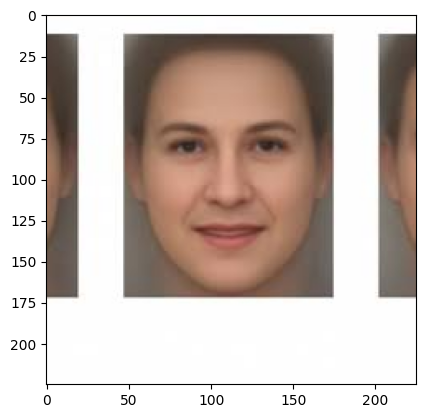

In [19]:
img1 = mpimg.imread('/content/data/without_mask/without_mask_2036.jpg')
plt.imshow(img1)
plt.show()

Now, we shall perform some operations on the image.
1. Resizing
2. Converting to numpy arrays


We shall aim to do this in minimal steps using iteration over all image paths and common home path.

In [20]:
import numpy as np

data = []
home_dir = '/content/data/with_mask/'
#performing operations for the with mask images



for image_dir in with_mask_files:
  image_path = home_dir + image_dir
  image = Image.open(image_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

home_dir = '/content/data/without_mask/'
##performing operations for without mask images
for image_dir in without_mask_files:
  image_path = home_dir + image_dir
  image = Image.open(image_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[ 55,  31,  21],
        [ 54,  30,  20],
        [ 51,  27,  17],
        ...,
        [ 43,  28,  21],
        [ 39,  25,  16],
        [ 37,  23,  14]],

       [[ 58,  34,  24],
        [ 58,  34,  24],
        [ 57,  33,  23],
        ...,
        [ 65,  50,  43],
        [ 58,  44,  36],
        [ 54,  41,  31]],

       [[ 57,  30,  21],
        [ 57,  30,  21],
        [ 58,  31,  22],
        ...,
        [ 78,  63,  56],
        [ 74,  59,  51],
        [ 71,  57,  48]],

       ...,

       [[235, 172, 131],
        [235, 172, 131],
        [236, 173, 132],
        ...,
        [ 12,  14,  11],
        [ 13,  14,  10],
        [ 13,  14,   9]],

       [[235, 170, 130],
        [235, 170, 130],
        [236, 171, 131],
        ...,
        [  8,  10,   5],
        [  9,  10,   5],
        [ 10,  11,   6]],

       [[235, 170, 130],
        [235, 170, 130],
        [236, 171, 131],
        ...,
        [  8,  10,   5],
        [  9,   9,   4],
        [ 10,   9,   4]]], dtype=uint8)
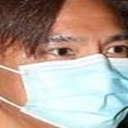

In [21]:
#Now, lets have a look at the data so obtained

data[0]

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
## now that we have created a numpy array post reziing to oprimal pixel size, let convert data to x train and y train
X = np.array(data)
Y = np.array(labels)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)
X_train.shape
Y_train.shape

(5664,)

In [31]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [32]:
##Now, that we are done scaling, lets get to creating the model using tensorflow and compl=ile, then finally, fit
import tensorflow
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 147s 899ms/step - acc: 0.6918 - loss: 0.6130 - val_acc: 0.8607 - val_loss: 0.3236
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 138s 862ms/step - acc: 0.8977 - loss: 0.2805 - val_acc: 0.8854 - val_loss: 0.2412
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 862ms/step - acc: 0.9011 - loss: 0.2464 - val_acc: 0.9065 - val_loss: 0.2341
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - acc: 0.9229 - loss: 0.2084 - val_acc: 0.9189 - val_loss: 0.1977
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 162s 867ms/step - acc: 0.9385 - loss: 0.1649 - val_acc: 0.9065 - val_loss: 0.2308


In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - acc: 0.9232 - loss: 0.1960
Test Accuracy = 0.9184753894805908


In [2]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')